In [50]:
# Setting up dependencies to be utilized later here.
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import calendar


In [51]:
# Converting .csv file into a dataframe for data manipulation
wa_lottery_path_2020 = Path("Resources/2020_lottery_data.csv")
wa_lottery_df_2020 = pd.read_csv(wa_lottery_path_2020)

# displaying .csv just to see what data we have
wa_lottery_df_2020

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,1/1/2020,Wed,49-53-57-59-62,26,2,220000000
1,1/4/2020,Sat,1-11-21-25-54,7,2,237000000
2,1/8/2020,Wed,2-4-7-43-56,22,4,258000000
3,1/11/2020,Sat,3-21-23-31-59,3,2,277000000
4,1/15/2020,Wed,39-41-53-55-68,19,2,296000000
...,...,...,...,...,...,...
100,12/16/2020,Wed,4-23-37-61-67,7,2,287000000
101,12/19/2020,Sat,27-32-34-43-52,13,2,304000000
102,12/23/2020,Wed,6-13-38-39-53,6,3,321000000
103,12/26/2020,Sat,10-24-27-35-53,18,2,341000000


In [89]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerball'
weekday_powerball_2020 = wa_lottery_df_2020[['weekday','powerball']]

# groupby weekday (sets index to weekday), for the column 'powerball' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
# lambda is a keyword that is built into python to create a anonymous function
# lambda : An anonymous inline function consisting of a single expression which is evaluated when the function is called. 
# The syntax to create a lambda function is lambda [parameters]: expression.  This is from the official python documentation
powerball_grouped_2020 = weekday_powerball_2020.groupby('weekday')['powerball'].apply(lambda x: x.mode())

In [90]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerplay'
weekday_powerplay_2020 = wa_lottery_df_2020[['weekday', 'powerplay']]

# groupby weekday (sets index to weekday), for the column 'powerplay' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
powerplay_grouped_2020 = weekday_powerplay_2020.groupby('weekday')['powerplay'].apply(lambda x: x.mode())

In [91]:
# Combine powerplay/powerball common 2020 DataFrames
combined_common_weekday_2020 = pd.merge(powerball_grouped_2020, powerplay_grouped_2020, on ='weekday')

# Display the data types of the columns in the DataFrame


# Question 1 Answer
combined_common_weekday_2020

,powerball,powerplay
weekday,,
Sat,18,2
Wed,2,2


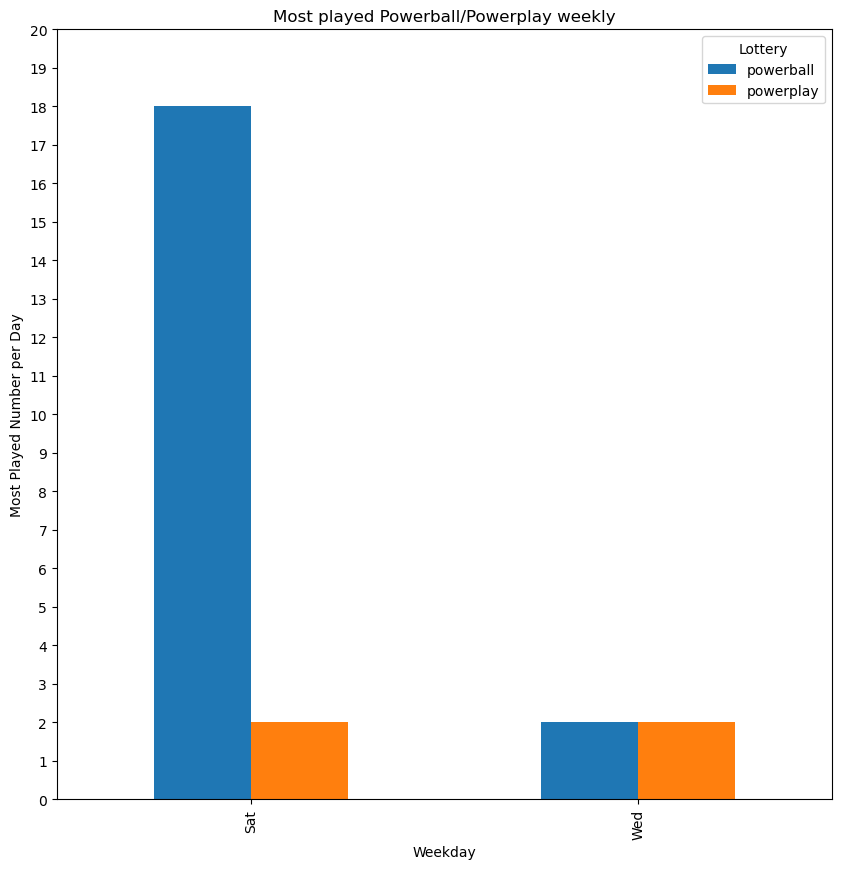

<Figure size 640x480 with 0 Axes>

In [92]:
# Create a bar chart based off of the group series from before
ax = combined_common_weekday_2020.plot(kind='bar', figsize=(10,10))

# set the y-axis so it looks better
ax.set_ylim(0, 19)
ax.set_yticks(range(0, 21, 1))

# Label the axis and title the graph
ax.set_xlabel("Weekday")
ax.set_ylabel("Most Played Number per Day")
ax.set_title('Most played Powerball/Powerplay weekly')
ax.legend(title = 'Lottery', loc = 'upper right')

plt.show()
plt.tight_layout()


In [113]:
# create a copy of the original dataframe with columns 'date' and 'powerball'
# This will eliminate any warnings about the original dataframes index
date_powerball_2020 = wa_lottery_df_2020[['date', 'powerball']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerball_2020['date'] = pd.to_datetime(date_powerball_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerball_2020['month'] = date_powerball_2020['date'].dt.month

# make a variable that holds a dataframe that is grouped by month
month = date_powerball_2020.groupby('month')

# create an empty dictionary
powerball_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1,13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    # Getting rows

    # take the variable month_data the mode and store to list
    powerball_common_2020[i] = month_data['powerball'].mode().to_list()

# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerball_common_series_2020 = (pd.Series(powerball_common_2020))

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerball_common_2020 = powerball_common_series_2020.apply(lambda x: x if len(x) != 9 else None)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerball_common_months_2020 = cleaned_powerball_common_2020.to_frame(name='Common Powerballs')  

In [128]:
# create a copy of the original dataframe with columns 'date' and 'powerplay'
# This will eliminate any warnings about the original dataframes index
date_powerplay_2020 = wa_lottery_df_2020[['date', 'powerplay']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerplay_2020['date'] = pd.to_datetime(date_powerplay_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerplay_2020['month'] = date_powerplay_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = date_powerplay_2020.groupby('month')

# create an empty dictionary
powerplay_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerplay_common_2020[i] = month_data['powerplay'].mode().to_list()
    
# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerplay_common_series_2020 = pd.Series(powerplay_common_2020)

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerplay_common_2020 = powerplay_common_series_2020.apply(lambda x: x if len(x) != 9 else None)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerplay_common_months_2020 = cleaned_powerplay_common_2020.to_frame(name='Common Powerplays')  


In [149]:
# combine the two dataframes that hold the months together
combined_common_months_2020 = pd.merge(powerplay_common_months_2020, powerball_common_months_2020, left_index=True, right_index=True)

# Use calendar library for abbreviations and order
month = dict((enumerate(calendar.month_name)))

# rename function for index change
combined_common_months_2020 = combined_common_months_2020.rename(index=month)



# Question 2 Answer

print(f"One of the most common powerball numbers for the year 2020 was August {combined_common_months_2020.loc['August','Common Powerballs']}")
print(f"One of the most common powerball numbers for the year 2020 was August {combined_common_months_2020.loc['August','Common Powerplays']}")
combined_common_months_2020

One of the most common powerball numbers for the year 2020 was August [24]
One of the most common powerball numbers for the year 2020 was August [3]


,Common Powerplays,Common Powerballs
January,[2],[18]
February,[3],[13]
March,[2],[8]
April,"[2, 3]",None
May,[2],[20]
June,[3],"[5, 18]"
July,[2],"[4, 18]"
August,[3],[24]
September,[2],"[1, 18]"
October,[2],None


        Month       Type Value
0     January  Powerplay     2
1    February  Powerplay     3
2       March  Powerplay     2
3       April  Powerplay     2
4       April  Powerplay     3
5         May  Powerplay     2
6        June  Powerplay     3
7        July  Powerplay     2
8      August  Powerplay     3
9   September  Powerplay     2
10    October  Powerplay     2
11   November  Powerplay     2
12   December  Powerplay     2
0     January  Powerball    18
1    February  Powerball    13
2       March  Powerball     8
3       April  Powerball  None
4         May  Powerball    20
5        June  Powerball     5
6        June  Powerball    18
7        July  Powerball     4
8        July  Powerball    18
9      August  Powerball    24
10  September  Powerball     1
11  September  Powerball    18
12    October  Powerball  None
13   November  Powerball    18
14   December  Powerball     4


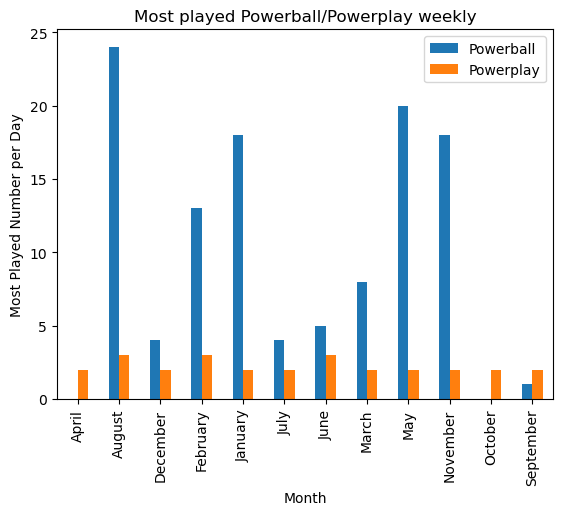

In [150]:
# question 2 Graphed

# Explode my combined_common_months_2020 so that I can put it back into a dataframe that is more malleable for graphing
powerplay_nums = combined_common_months_2020['Common Powerplays'].explode()
powerball_nums = combined_common_months_2020['Common Powerballs'].explode()


# Create a new DataFrame with the exploded data
powerplay_nums_2020 = pd.DataFrame({'Month': powerplay_nums.index, 'Type': 'Powerplay', 'Value': powerplay_nums.values})
powerball_nums_2020 = pd.DataFrame({'Month': powerball_nums.index, 'Type': 'Powerball', 'Value': powerball_nums.values})

powerplay_powerball_nums_2020 = pd.concat([powerplay_nums_2020, powerball_nums_2020], axis = 0)

print(powerplay_powerball_nums_2020)
# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html, https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot
# https://builtin.com/data-science/pandas-pivot-tables
# Index is set to 'Month' in powerplay_powerball_nums_2020
# Columns is set to 'Type' from powerplay_powerball_nums_2020 (powerball, powerplay)
# values is set to 'Value' column which is the powerplay numbers and powerball numbers respectively.
# The aggfunc took longer to figure out, it takes the first non-null value for each index and column values

powerplay_powerball_nums_2020.pivot_table(index='Month', columns='Type', values='Value', aggfunc='first').plot(kind='bar')
plt.ylabel('Most Played Number per Day')
plt.title('Most played Powerball/Powerplay weekly')
plt.xticks(rotation=90)
plt.legend(title=None)
plt.show()


In [151]:
# generate a new dataframe to hold year data for weekday, powerplay, powerball
year_tot_common_2020 = wa_lottery_df_2020.copy()
powerlist = ['powerball', 'powerplay']
# use the same function as before to find the maxiumum value that is repeated over the entire year for powerplay and powerball
year_common_powernums_2020 = year_tot_common_2020.groupby('weekday')[powerlist].apply(lambda x: x.mode().max())


#Answer to Question 3

print(f"There was only one common PowerBall number for Saturday {year_common_powernums_2020.loc['Sat', 'powerball']}, and Wednesday {year_common_powernums_2020.loc['Wed', 'powerball']}")
print(f"There was only one common PowerBall number for Saturday {year_common_powernums_2020.loc['Sat', 'powerplay']}, and Wednesday {year_common_powernums_2020.loc['Wed', 'powerplay']}")


There was only one common PowerBall number for Saturday 18, and Wednesday 2
There was only one common PowerBall number for Saturday 2, and Wednesday 2


In [152]:
# make a copy of the original DataFrame to manipulate
month_lottery_df_2020 = wa_lottery_df_2020.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
month_lottery_df_2020['date'] = pd.to_datetime(month_lottery_df_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
month_lottery_df_2020['month'] = month_lottery_df_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = month_lottery_df_2020.groupby('month')

# create an empty dictionary
jackpot_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest
    jackpot_common_2020[i] = month_data['jackpot'].mode().max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
jackpot_common_months_2020 = pd.DataFrame.from_dict(jackpot_common_2020, orient='index', columns=['Common Jackpot'])

# https://stackoverflow.com/questions/61842649/renaming-months-from-number-to-name-in-pandas
# Utilizing pythons calendar function, converted the index to the abbreviated months
# Use calendar library for month name
month = dict((enumerate(calendar.month_name)))

# add month to dataframe
jackpot_common_months_2020['Months'] = month


# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_months_jackpot = jackpot_common_months_2020.sort_values(by=['Common Jackpot'], ascending = False)


# ANSWER QUESTION 4

print(top_months_jackpot.head(5))

    Common Jackpot    Months
1        394000000   January
12       363000000  December
11       216000000  November
4        190000000     April
8        169000000    August


In [153]:
# Generated a new dataframe that holds only the three columns 'date' + 'weekday' + 'jackpot'
weekday_jackpot_2020 = wa_lottery_df_2020[['date', 'weekday', 'jackpot']]

# find the highest jackpot
greatest_jackpot_2020 = weekday_jackpot_2020.loc[weekday_jackpot_2020['jackpot'].idxmax()]



#ANSWER QUESTION 5 

print(f"{greatest_jackpot_2020.date} had the greatest jackpot for 2020 with {greatest_jackpot_2020.jackpot} dollars.")

1/29/2020 had the greatest jackpot for 2020 with 394000000 dollars.


C:\Users\eeels\AppData\Local\Temp\ipykernel_15036\2513329071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_jackpot_2020['date'] = pd.to_datetime(weekday_jackpot_2020['date'])


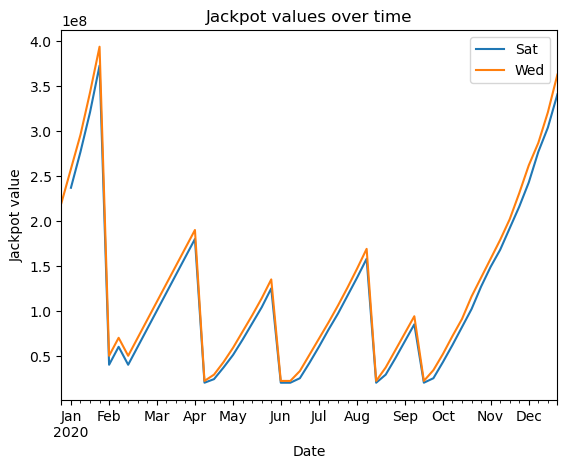

In [154]:
weekday_jackpot_2020['date'] = pd.to_datetime(weekday_jackpot_2020['date'])

fig, ax = plt.subplots()

for day, group in weekday_jackpot_2020.groupby('weekday'):
    group.plot(x='date', y='jackpot', ax = ax, label = day)

# Set the title and axis labels
ax.set_title('Jackpot values over time')
ax.set_xlabel('Date')
ax.set_ylabel('Jackpot value')

plt.show()